---
bibliography:
  - bibliography.bib
---

# Testing Model Assumptions: Residual Analysis

## Assumptions Concerning the Error Term $\varepsilon$ [^tma-error-term]

In this section, we will focus on the error term $\varepsilon$. The distribution of the regression coefficients depends on the distribution of the error term $\varepsilon$. The distribution of the error term $\varepsilon$ hence determines to which level our model predictions are correct. In this section, we assume that

$$
Y = f(X) + \varepsilon
$$

where the function $f(X)$ is assumed to be known. In practice, this is never the case. To focus on the assumptions concerning the error term $\varepsilon$, we will consider rather simple functions $f(x)$.

**What is the meaning of $\varepsilon$?**

If we measure $Y$ at position $x_i$, then the following equation

$$
y_i = f(x_i) + \varepsilon_i
$$

holds, where $\varepsilon_i$ represents the error of the function $f$ at position $x_i$, or to be more concise: it represents the deviation of the measured value $y_i$ from the predicted value of $f(x_i)$. If we repeat the measurement several times at the same position $x_i$, we will observe for every measurement a different value of $y_i$ due to the error term $\varepsilon_i$.



[^tma-error-term]: [@birbaumerPredictiveModelingLecture2025, p. 129]

:::{prf:assumption} Model Assumptions for the Error Terms $ \varepsilon_i $
The error terms $ \varepsilon_i $ are independent and normally distributed random variables with a constant variance:

$$ \varepsilon_i \text{ i.i.d. } \mathcal{N}(0,\sigma^2) $$

**More precisely:**

1. For the expected value of all $ \varepsilon_i $ we have $\mathbb{E}[\varepsilon_i] = 0$
2. The error terms $ \varepsilon_i $ all have the same constant variance $\operatorname{Var}[\varepsilon_i] = \sigma^2 $
3. The error terms $ \varepsilon_i $ are normally distributed $\varepsilon_{i} \sim \mathcal{N}(0, \sigma^2)$
4. The error terms $ \varepsilon_i $ are independent
:::

## $R^2$ Statistic [^r2-statistic]

The RSE provides an absolute measure of lack of fit of the linear regression model

:::{prf:definition} Simple Linear Regression Model
$$
Y = \beta_0+\beta_1 X+\epsilon
$$
:::

to the data. But since it is measured in the units of $Y$, it is not always clear what constitutes a good RSE. The $R^2$ statistic provides an alternative measure of fit. It takes the form of a proportion—the proportion of variance explained—and so it always takes on a value between $0$ and $1$, and is independent of the scale of $Y$.

To calculate $R^2$, we use the formula

:::{prf:definition} $R^2$ Statistic
$$
R^2 = 1 - \dfrac{\sum_{i=1}^n (y_i-\hat{y}i)^2}{\sum{i=1}^n (y_i-\bar{y})^2} = 1 - \dfrac{\text{RSS}}{\text{TSS}}
$$
:::

where $\text{TSS}=\sum_{i=1}^n (y_i-\bar{y})^2$ is the total sum of squares and $\text{RSS}=\sum_{i=1}^n (y_i-\hat{y}_i)^2$ is the residual sum of squares. TSS measures the total variance in the response $Y$, and can be thought of as the amount of variability inherent in the response before the regression is performed. In contrast, RSS measures the amount of variability that is left unexplained after performing the regression.

If the model fits the data perfectly, then we have $\hat{y}_i=y_i$ for $i=1,\ldots,n$. In this case, the RSS becomes $0$, and hence $R^2=1$. As a consequence, an $R^2$ value of approximately $1$ means that a large part of the variance in the data is explained by the model. Conversely, an $R^2$ value near $0$ indicates that little of the variance in the data is explained by the model. This might occur because the linear model is wrong, or the inherent error $\sigma^2$ is high, or both.

[^r2-statistic]: [@birbaumerPredictiveModelingLecture2025, p. 137]

### Compute $R^2$ with statsmodels [^example-6-2-3]

We find the $ R^{2} $-value for the example 6.1.2.

[^example-6-2-3]: [@birbaumerPredictiveModelingLecture2025, Example 6.2.3]

In [1]:
import numpy as np
import statsmodels.api as sm

# Set random seed
np.random.seed(0)
# Create Random data allong y = x^2 + 4 
x = np.arange(-4, 2.4, .4)
y = -(x * x) + 4 + np.random.normal(0, 2, len(x))

# Fit Linear Model
x_sm = sm.add_constant(x)
model = sm.OLS(y,x_sm).fit()

# Print Model Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     14.91
Date:                Mon, 03 Nov 2025   Prob (F-statistic):            0.00173
Time:                        16:42:42   Log-Likelihood:                -40.363
No. Observations:                  16   AIC:                             84.73
Df Residuals:                      14   BIC:                             86.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6174      0.917      2.855      0.0

/Users/marbetschar/Development/marbetschar/notes/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  k, _ = kurtosistest(a, axis)


The $ R^{2} $ value is  $ 0.516 $.

## $E[\varepsilon_{i}] = 0$ [^tma-6.2.2]

The linear model assumes that there is a straight-line relationship between the predictor and the response. If the true relationship is far from linear, then virtually all of the conclusions that we draw from the fit are suspect. In addition, the prediction accuracy of the model can be significantly reduced.

*Residual plots* are a useful graphical tool for identifying non-linearity of the regression function $f$. Given a simple linear regression model, we can plot the residuals
$r_i = y_i - \hat{y}_i$
versus the fitted or predicted values $\hat{y}_i$. We thus plot the points $(\hat{y}_i, r_i)$ for $i = 1, \ldots, n$. The resulting plot is named *Tukey–Anscombe-Plot* after its inventors.

[^tma-6.2.2]: [@birbaumerPredictiveModelingLecture2025, p. 140]

### Tukey–Anscombe-Plots [^example-6.2.4]

On the left-hand panel of the Figure the scatter plot for the **Advertising** data set is displayed. The right-hand panel displays the corresponding Tukey-Anscombe plot.

[^example-6.2.4]: [@birbaumerPredictiveModelingLecture2025, Example 6.2.4]

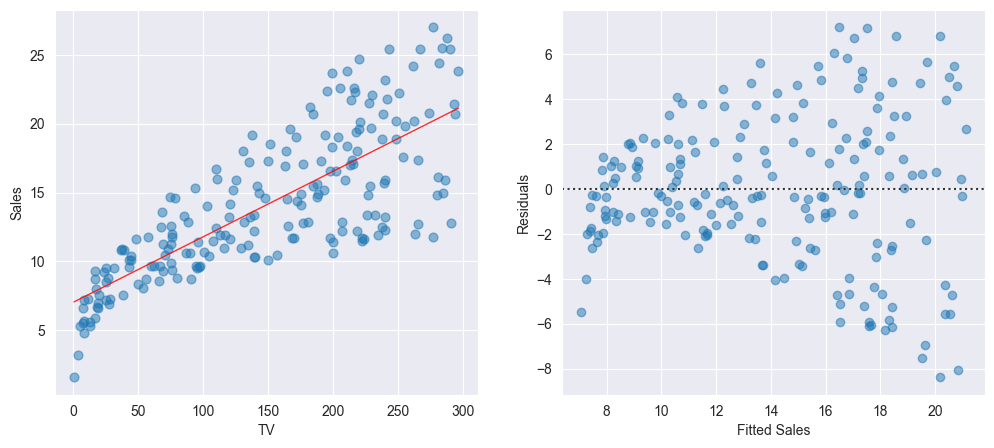

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('data/Advertising.csv')
x = df['TV']
y = df['sales']

""" Find Predictions and Residuals """
# Fit Linear Model
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
# Find the predicted values for the original design.
yfit = model.fittedvalues
# Predict values based on the fit.
ypred = model.predict(x_sm)
# Residuals of the model
res = model.resid

""" Plots """
# Create figure and subplots
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
# Plot data and regression
sns.regplot(x=x, y=y, 
            scatter=True, ci=False, lowess=False, 
            scatter_kws={'s': 40, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
# Set Labels
ax1.set_xlabel('TV')
ax1.set_ylabel('Sales')

# Plot Residuals
ax2 = fig.add_subplot(122)
df = pd.concat([yfit, res], axis=1)
sns.residplot(x=yfit, y=res, data=df, 
              lowess=False, scatter_kws={'alpha': 0.5})
ax2.set_xlabel('Fitted Sales')
ax2.set_ylabel('Residuals')

# Show plots
plt.show()

We observe that the regression line on the left-hand panel corresponds to the horizontal axis on the right-hand panel of the Figure. We now can easily read off the values of the residuals for every predicted value $\hat{y}_{i}$.

The linear model fits the data well if the points in the Tukey-Anscombe plot scatter evenly around the $r = 0$ line. “Evenly distributed” means, that within a small area of the $r = 0$ line there are approximately as many points above the line as there are points below the line. These points should ideally have the same distance from the $r = 0$ line. In other words, in such an area for the average of the residuals

$$
\bar{r} \approx 0
$$

should hold. Since we are estimating the error terms by means of the residuals, this relation finally is equivalent to the model assumption $E[\varepsilon_i] = 0$.

### Smoothing Approach [^example-6.2.5]

How can we decide on the basis of the Tukey-Anscombe plot whether the model assumption
$ E (\epsilon_{i})=0 $ is fulfilled? To visualize the relation between the residuals $ r_{i}$ and the predicted response values $\hat{y}_{i}$, we will take advantage of the *smoothing approach*. 

In the following, we will roughly illustrate the principle of the smoothing approach. A simple yet intuitive smoother is the *running mean*. It involves taking a fixed window width on the $ \hat{y} $-axis, and compute the mean of the $ r $-values of all the observations that fall into this window. This value then is the estimate for the function value at the window center. The left-hand panel of the Figure below displays two thin stripes : the average of all residuals falling into such a stripe is calculated and is plotted as a red point at the center of the corresponding stripe. If the stripes are sliding along the $ \hat{y} $-axis, connecting the red points for every window position then results in the red curve displayed in the right-hand panel of Figure below.

[^example-6.2.5]: [@birbaumerPredictiveModelingLecture2025, Example 6.2.5]

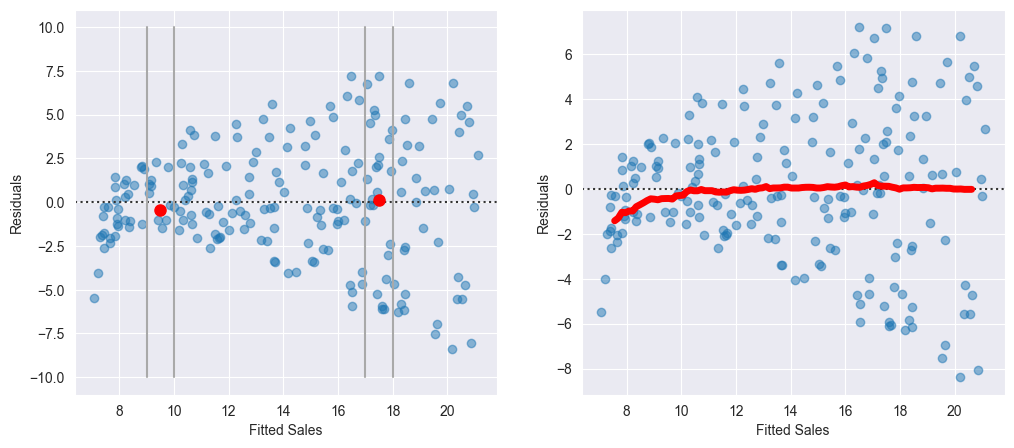

In [3]:
# This example builds on onto Example 2.4
import numpy as np

""" Plots """
# Create Figure and subplots
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)

# Visualize Moving average:
# Plot Residuals
sns.residplot(x=yfit, y=res, data=df, 
              lowess=False, scatter_kws={'alpha': 0.5})
# Plot vertical lines and average to visualize moving average
bandwidth = 0.5

for x_avg in [9.5, 17.5]:
    # Find indices where ypred is within range
    index_res = (np.where(ypred > (x_avg - bandwidth)) and 
                 np.where(ypred < (x_avg + bandwidth)))
    # Find mean of Residuals
    res_mean = res[index_res[0]].mean()
    # Plot lines
    plt.plot((x_avg-bandwidth, x_avg - bandwidth ), 
             [-10, 10], color='darkgrey')
    plt.plot((x_avg+bandwidth, x_avg + bandwidth ), 
             [-10, 10], color='darkgrey')
    # Plot average
    plt.plot(x_avg, res_mean, color='red', marker='o', markersize=8)

# Set labels
ax1.set_xlabel('Fitted Sales')
ax1.set_ylabel('Residuals')

# Find moving average over full domain
# create x vector
x_avg = np.linspace(ypred.min() + bandwidth, 
                    ypred.max() - bandwidth, 100)
res_mean = []
for x_ in x_avg:
    # Find indices where ypred is within range
    index_res = (np.where(ypred > (x_ - bandwidth)) and 
                 np.where(ypred < (x_ + bandwidth)))
    # Find mean of Residuals
    res_mean.append(res[index_res[0]].mean())

# Second subplot:
ax2 = fig.add_subplot(122)
# Plot Residuals
sns.residplot(x=yfit, y=res, data=df, 
              lowess=False, scatter_kws={'alpha': 0.5})
# Plot moving average:
plt.plot(x_avg, res_mean, 'r-', linewidth=5)
# Set labels
ax2.set_xlabel('Fitted Sales')
ax2.set_ylabel('Residuals')

# Show plot
plt.show()

### LOESS smoother [^example-6.2.6]

We generate for the **Income** data the Tukey-Anscombe plot along with the LOESS smoothing curve (see the Figure below).

[^example-6.2.6]: [@birbaumerPredictiveModelingLecture2025, Example 6.2.6]

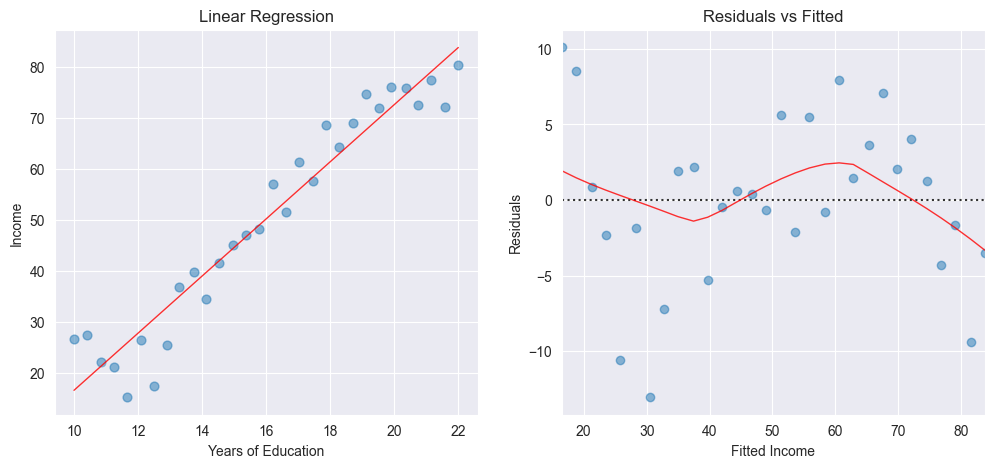

In [4]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from TMA_def import plot_residuals, plot_reg

# Read data
df = pd.read_csv('data/Income.csv')
x = df['education']
y = df['income']

# Fit Linear Model
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
# Find the predicted values for the original design.
yfit = model.fittedvalues
# Find the Residuals
res = model.resid

# Create Figure and subplots
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
# Plot data using definition from TMA_def
plot_reg(ax1, x, y, model, x_lab="Years of Education",
         y_lab="Income", title="Linear Regression")

# Second Subplot
ax2 = fig.add_subplot(122)
# Plot Residuals using definition from TMA_def
plot_residuals(ax2, yfit, res, n_samp=0, x_lab="Fitted Income")

# Show plots
plt.show()

The red smoothing curve is not passing any more near to the dashed $ r=0 $ line. We are now confronted with the question whether the observed deviation of the smoothing curve from the $ r=0 $ line is plausible when assuming an underlying linear model. In other words, did the observed deviation simply occur due to a random variation or is there a systematic deviation from a linear model?  

If we repeat the measurements, then we would observe a different distribution of the data points and the smoothing curve would follow a different path. If the new smoothing curve then passes next to the $r = 0 $ line, we would not have any reason to question the linearity assumption. 

But how can we decide whether a smoothing curve systematically deviates from the $ r = 0$ line, or when is this just due to a random variation? Generally, this is an expert call based on the magnitude of the deviation and the number of data points which are involved. An elegant way out of these (sometimes difficult) considerations is given by a *resampling approach*.

The principle idea of our resampling approach consists of simulating data points on the basis of the existing data set. For the simulated data points we fit a smoothing curve and add it to the Tukey-Anscombe plot.

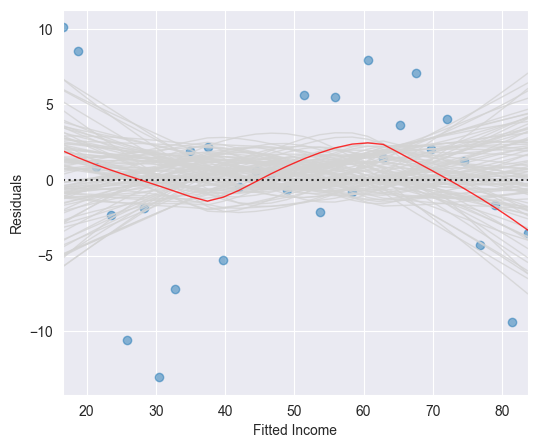

In [5]:
import random

random.seed(0)
n_samp = 100   # Number of resamples

# Create Figure and subplots
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)

# For every random resampling
for i in range(n_samp):
    # 1. resample indices from Residuals
    samp_res_id = random.sample(list(res), len(res))
    # 2. Average of Residuals, smoothed using LOWESS 
    sns.regplot(x=yfit, y=samp_res_id, 
                scatter=False, ci=False, lowess=True, 
                line_kws={'color': 'lightgrey', 'lw': 1, 'alpha': 0.8})
    # 3. Repeat again for n_samples 

# Plot original smoothing curve
sns.residplot(x=yfit, y=res, data=df, 
              lowess=True, scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.xlabel("Fitted Income")
plt.ylabel("Residuals")

# Show plots
plt.show()

:::{prf:algorithm} Resampling

**Step 1:** We keep the predicted values $\hat{y}_i$ as they are. Then, we
assign to each $\hat{y}_i$ a new residual $ r^{*}_i $ which we obtained from sampling with replacement among the existing set of $ r_{i} $.

**Step 2:** On the basis of the new data pairs $(\hat{y}_i,r^{*}_i)$, a smoothing curve is fitted, and it is added to the Tukey-Anscombe plot as a grey line (the resampled data points are not shown).

**Step 3:** The entire process is repeated for a number of times, e.g. one-hundred times.
:::

These simulated smoothing curves illustrate the magnitude which a random deviation
from the $ r = 0 $ line can take on. It may help us to assess the smoothing curve constructed on the basis of the original residuals.

If the underlying regression function $ f $ is linear, then the (grey) band resulting from the simulated smoothing curves should follow the $ r=0 $ line and contain the original (red) smoothing curve fitted on the basis of the original data set.

The red smoothing curve displayed in the Figure above lies within the (grey) band of simulated smoothing curves. We therefore conclude that the wiggly shape of the (red) smoothing curve is not critical. We thus may assume a linear underlying regression function $ f $.

## $Var[\varepsilon_{i}] = \sigma^2$

### Scale Location Plot [^example-6.2.9]
The Figure below displays the *scale location plot* for the **Advertising** data.

[^example-6.2.9]: [@birbaumerPredictiveModelingLecture2025, Example 6.2.9]

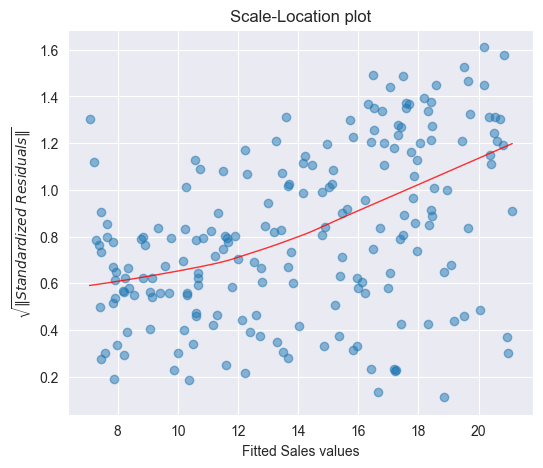

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt

# Load data
df = pd.read_csv('data/Advertising.csv')
x = df['TV']
y = df['sales']

# Fit Linear Model
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
# Find the predicted values for the original design.
yfit = model.fittedvalues
# Residuals of the model
res = model.resid
# Influence of the Residuals
res_inf = model.get_influence()
# Studentized residuals using variance from OLS
res_standard = res_inf.resid_studentized_internal
# Absolute square root Residuals:
res_stand_sqrt = np.sqrt(np.abs(res_standard))

# Create Figure and subplots
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(111)

# plot Square rooted Residuals
plt.scatter(yfit, res_stand_sqrt, alpha=0.5)
# plot Regression usung Seaborn
sns.regplot(x=yfit, y=res_stand_sqrt, 
            scatter=False, ci=False, lowess=True, 
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax1.set_title('Scale-Location plot')
ax1.set_xlabel('Fitted Sales values')
ax1.set_ylabel('$\sqrt{\|Standardized\ Residuals\|}$')

# Show plot
plt.show()

We observe that the magnitude of the residuals tend to increase with the fitted values, indicating a non-constant variance of the error terms $\epsilon_{i}$. To test whether this deviation is due to a random variation or whether it is of systematic nature, we will run again simulations by resampling the data.

To see whether a deviating smoothing curve in a scale location plot may be related to a random effect, we run again simulations by sampling the data with replacement and by fitting smoothing curves on the basis of the resampled data. The Figure below displays a band of 100 simulated smoothing curves that were fitted on the basis of the resampled data.   
Since the (red) curve does not follow a path contained within this (grey) band of curves, we conclude that there is a systematic increase of the variances. 

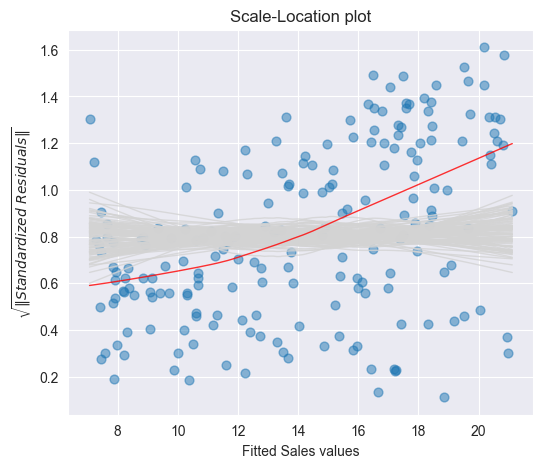

In [7]:
from TMA_def import plot_scale_loc

n_samp = 100   # Number of resamples

# Create Figure
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(111)

# Plot Standardized Residuals using definition from TMA_def
plot_scale_loc(ax1, yfit, res_stand_sqrt, n_samp=100,
               x_lab="Fitted Sales values")

# Show plot
plt.show()

## $\varepsilon_{i} \sim N(0, \sigma^2)$

### Histogram [^example-6.2.11]

The residuals of the **Advertising** data set are plotted as a histogram in the Figure below. A normal density function with mean and variance estimated on the basis of the data is shown in green.

[^example-6.2.11]: [@birbaumerPredictiveModelingLecture2025, Example 6.2.11]

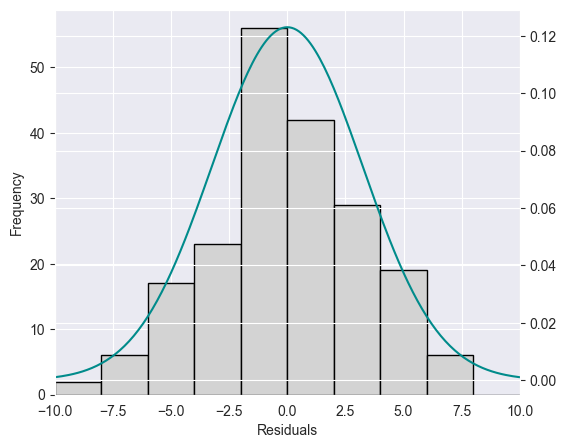

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from scipy.stats import norm

# Load data
df = pd.read_csv('data/Advertising.csv')
x = df['TV']
y = df['sales']

# Fit Linear Model
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
# Find the predicted values for the original design.
yfit = model.fittedvalues
# Residuals of the model
res = model.resid

# Create Figure and subplots
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(111)

# Plot histogram
res_bins = np.arange(-10, 12, 2)
plt.hist(res, bins=res_bins, 
         facecolor="lightgrey", edgecolor="k" )
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-10, 10)
plt.ylim(bottom=0)

# Plot estimated Normal density function
# new x axis
ax2 = ax1.twinx()
# Estimate mean and standard deviation
mu = np.mean(res)
sigma = np.std(res)
x_pdf = np.arange(-10, 10.1, 0.1)
# Plot Normal density function
ax2.plot(x_pdf, norm.pdf(x_pdf, mu, sigma), 
         '-', color="darkcyan", alpha=1)

# Show plot
plt.show()

It is in general difficult to judge on the basis of a histogram whether the data is normally distributed. In addition, histograms are sensitive with respect to the chosen interval width.

### Q-Q plot [^example-6.2.12]

A *Q-Q plot* or *normal plot* is another graphical tool to verify whether the data is normally distributed. In our context, we plot the quantiles of the empirical residuals versus the theoretical quantiles of a normal distribution.  Instead of the residuals we however use the standardized residuals $\widetilde{r}_i$ in our Q-Q plot.

[^example-6.2.12]: [@birbaumerPredictiveModelingLecture2025, Example 6.2.12]

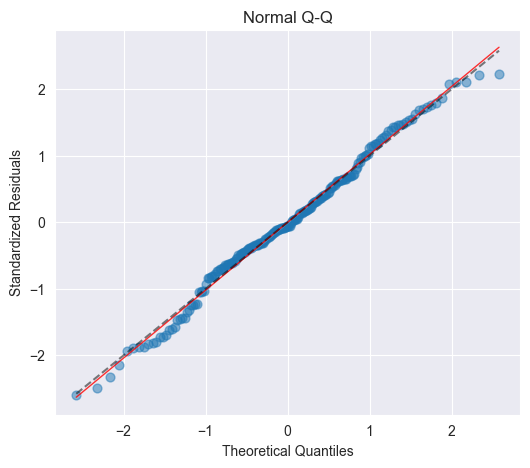

In [9]:
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# Influence of the Residuals
res_inf = model.get_influence()
# Studentized residuals using variance from OLS
res_standard = res_inf.resid_studentized_internal

# QQ plot instance
QQ = ProbPlot(res_standard)
# Split the QQ instance in the seperate data
qqx = pd.Series(sorted(QQ.theoretical_quantiles), name="x")
qqy = pd.Series(QQ.sorted_data, name="y")

# Create Figure and subplots
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(111)

sns.regplot(x=qqx, y=qqy, scatter=True, lowess=False, ci=False,
            scatter_kws={'s': 40, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax1.plot(qqx, qqx, '--k', alpha=0.5)

# Set labels
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')

plt.show()

If the data actually originates from a normal distribution, then the data points will scatter just slightly around the straight line in the Q-Q plot. 

If we observe a deviation from the straight line in the Q-Q plot, then the question comes up whether such a deviation is  systematic or due to a random variation. In order to answer this question, we run again simulations. In particular, we draw **100**
random samples of length $n$ (number of residuals) from a normal distribution that shares mean and standard deviation with the standardized residuals. The Figure below displays a band of simulated (grey) curves in the case of normally distributed residuals : these  curves may be observed due to random variations. Since the points for the **Advertising** data set lie within this band, we consider the residuals to originate from a normal distribution


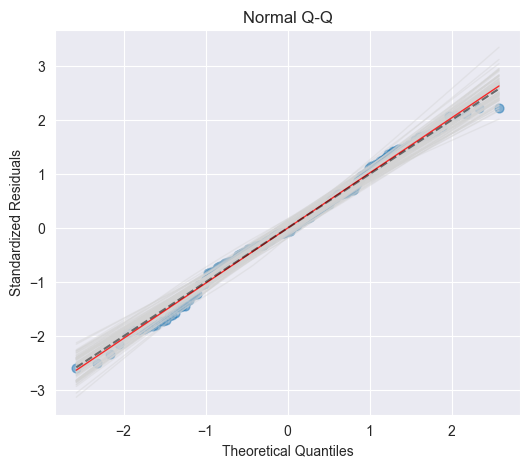

In [10]:
# Split the QQ instance in the seperate data
qqx = pd.Series(sorted(QQ.theoretical_quantiles), name="x")
qqy = pd.Series(QQ.sorted_data, name="y")
# Estimate the mean and standard deviation
mu = np.mean(qqy)
sigma = np.std(qqy)

# Create Figure
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(111)

n_samp = 100   # Number of resamples
# For ever random resampling
for lp in range(n_samp):
    # Resample indices 
    samp_res_id = np.random.normal(mu, sigma, len(qqx))
    # Plot
    sns.regplot(x=qqx, y=sorted(samp_res_id),
                scatter=False, ci=False, lowess=True, 
                line_kws={'color': 'lightgrey', 'lw': 1, 'alpha': 0.4})

# Add plots for original data and the line x = y
sns.regplot(x=qqx, y=qqy, scatter=True, lowess=False, ci=False,
            scatter_kws={'s': 40, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax1.plot(qqx, qqx, '--k', alpha=0.5)

# Set limits and labels
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')

plt.show()

## $\varepsilon_{i}$ Independence [^error-independence]

An important assumption of the linear regression model is that the error terms, $\varepsilon_1, \ldots, \varepsilon_n$, are independent. What does this mean? For instance, if the errors are independent, then the fact that $\varepsilon_i$ is positive provides little or no information about the sign of $\varepsilon_{i+1}$. The standard errors that are computed for the estimated regression coefficients or the fitted values are based on the assumption of independent error terms. If in fact there is correlation among the error terms, then the estimated standard errors will tend to underestimate the true standard errors. As a result, confidence and prediction intervals will be narrower than they should be. For example, a $95%$ confidence interval may in reality have a much lower probability than $0.95$ of containing the true value of the parameter. In addition, p-values associated with the model will be lower than they should be; this could cause us to erroneously conclude that a parameter is statistically significant. In short, if the error terms are correlated, we may have an unwarranted sense of confidence in our model.

[^error-independence]: [@birbaumerPredictiveModelingLecture2025, p. 158]

## Outliers and High Leverage Points [^outlier-vs-hlp]

### Outlier

An *outlier* is a point for which $y_i$ is far from the value $\hat{y}_i$ predicted by the model. Outliers can arise for a variety of reasons, such as incorrect recording of an observation during data collection.

### High Leverage Point

We just saw that outliers are observations for which the response $y_i$ is unusual given the predictor $x_i$. In contrast, observations with *high leverage* have an unusual value for $x_i$. For example, observation 41 in the Figure below has high leverage, in that the predictor value for this observation is large relative to the other observations. Contrary to observation 41, observation 5 has an unusually large $y_5$-value relative to $\hat{y}_5$. Observation 5 however is an outlier and does **not** have a high leverage since the predictor value is near to the other predictor values.

![](Outlier-vs-High-Leverage-Point.png)

#### Leverage Statistic

In order to quantify an observation’s leverage, we compute the *leverage statistic*. A large value of this statistic indicates an observation with high leverage. For a simple linear regression the value of the leverage statistic $h_i$ associated with the $i$th observation is given by

:::{prf:definition} Leverage Statistic
$$
h_i = \dfrac{1}{n} + \dfrac{(x_i - \bar{x})^2}{\displaystyle \sum_{j=1}^{n} (x_j - \bar{x})^2}
$$
:::

It is clear from this equation that $h_i$ increases with the distance of $x_i$ from $\bar{x}$. We interpret a high leverage point as a point having a large distance from the center of gravity $\bar{x}$ and thereby having a high “momentum to turn the regression line around”.


#### Cook's Distance

By means of the leverage statistic $h_i$ we can define another statistic to measure the influence of an observation: *Cook’s distance*. Cook’s distance measures to which extent the predicted value $\hat{y}_i$ changes if the $i$th observation is removed:

$$
d_i = \dfrac{1}{\hat{\sigma}^2} \cdot \left( \hat{y}*{(-i)} - \hat{y} \right)^{T} \left( \hat{y}*{(-i)} - \hat{y} \right)
$$

where $\hat{y}_{(-i)}$ denotes the vector of predicted values if the $i$th observation is removed. Cook’s distance can efficiently be calculated by means of the leverage statistic $h_i$ and the standardized residual $\tilde{r}_i$:

:::{prf:definition} Cook's Distance
$$
d_i = \tilde{r}_i^{2} \dfrac{h_i}{2(1 - h_i)}
$$
:::

The larger the value of Cook’s distance $d_i$ is, the higher is the influence of the corresponding observation on the estimation of the predicted value $\hat{y}_i$. In practice, we consider a value of Cook’s distance larger than $1$ as *dangerously influential*.

[^outlier-vs-hlp]: [@birbaumerPredictiveModelingLecture2025, p. 160]

## Summary

We have seen 4 possibilities how to analyze residuals graphically:

1. Tukey–Anscombe-Plots
2. Scale location plot
3. Q-Q plot
4. Cook's Distance

For the **Advertising** data set these residual plots are displayed in the Figure below [^example-6.2.14]

[^example-6.2.14]: [@birbaumerPredictiveModelingLecture2025, Example 6.2.14]

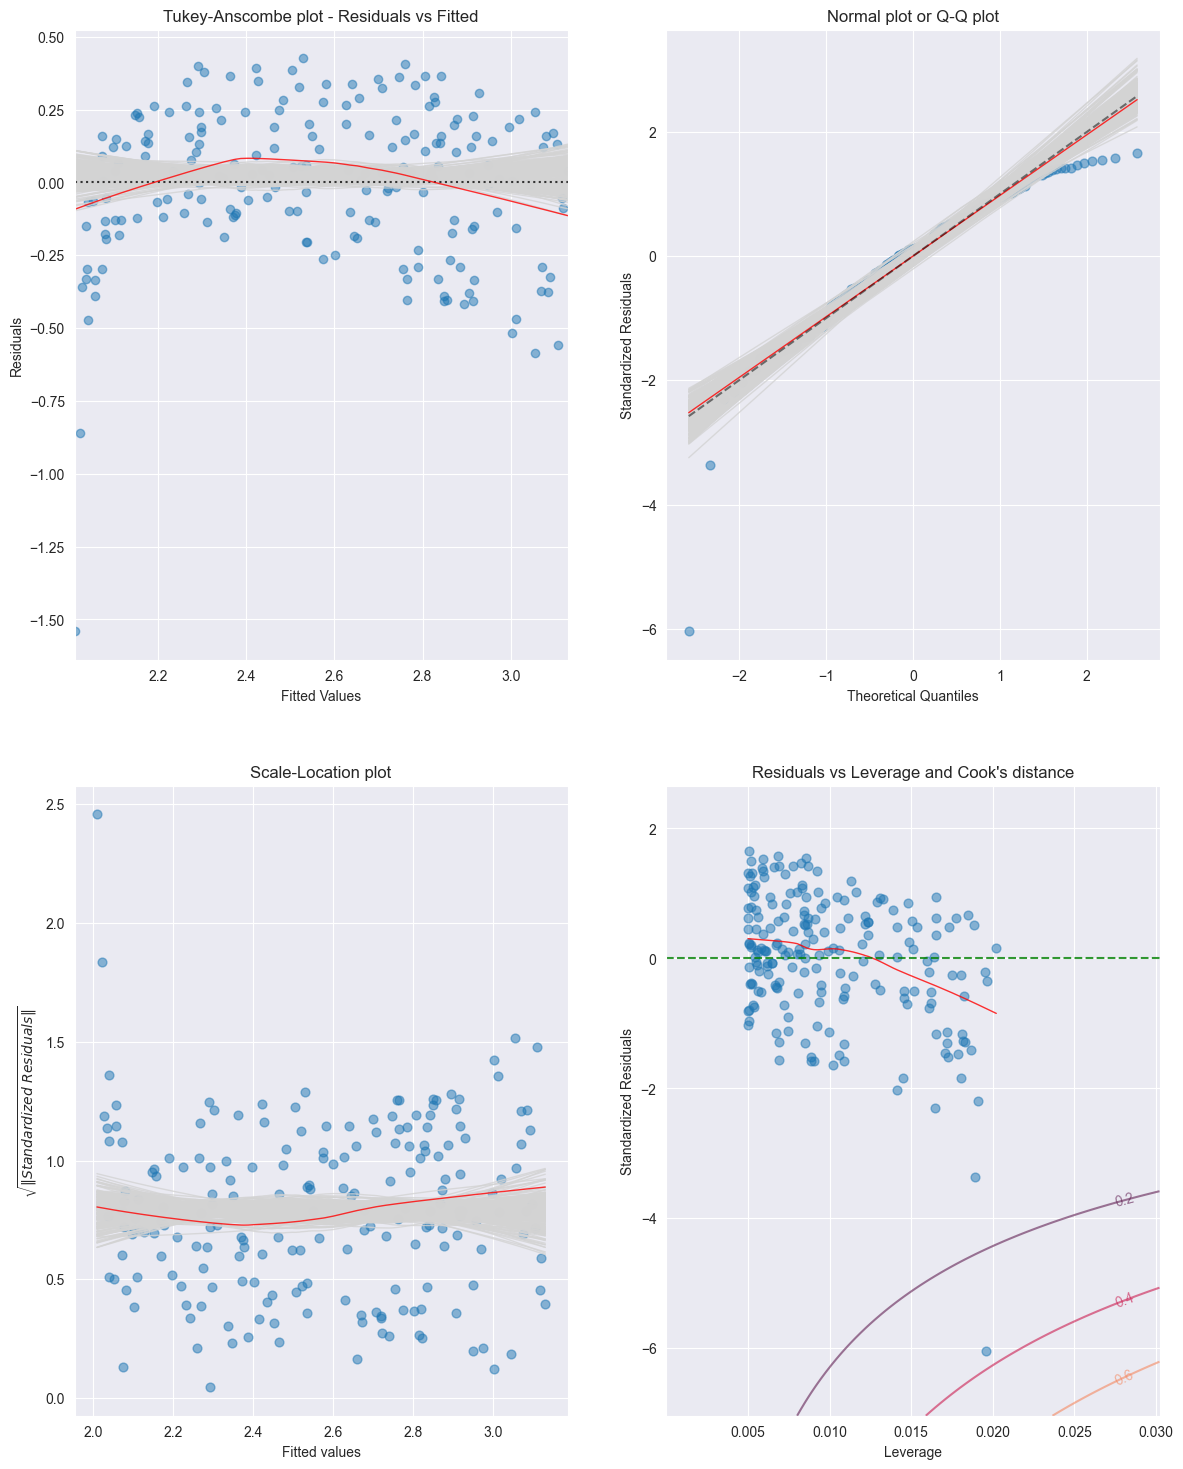

In [14]:
import statsmodels.api as sm
from TMA_def import *

# Read data
df = pd.read_csv('data/Advertising.csv')
x = df['TV']
y = df['sales']

# Reformat Data
dataframe = pd.concat([x, y], axis=1)

""" Find Predictions, Residuals and Influence on the Residuals """
# Fit Linear Model
x_sm = sm.add_constant(x)
model = sm.OLS(np.log(y), x_sm).fit()

tma_plots(model, n_samp = 200)

For the **Income** data set the residual plots are displayed in the Figure below [^example-6.2.15]

[^example-6.2.15]: [@birbaumerPredictiveModelingLecture2025, Example 6.2.15]

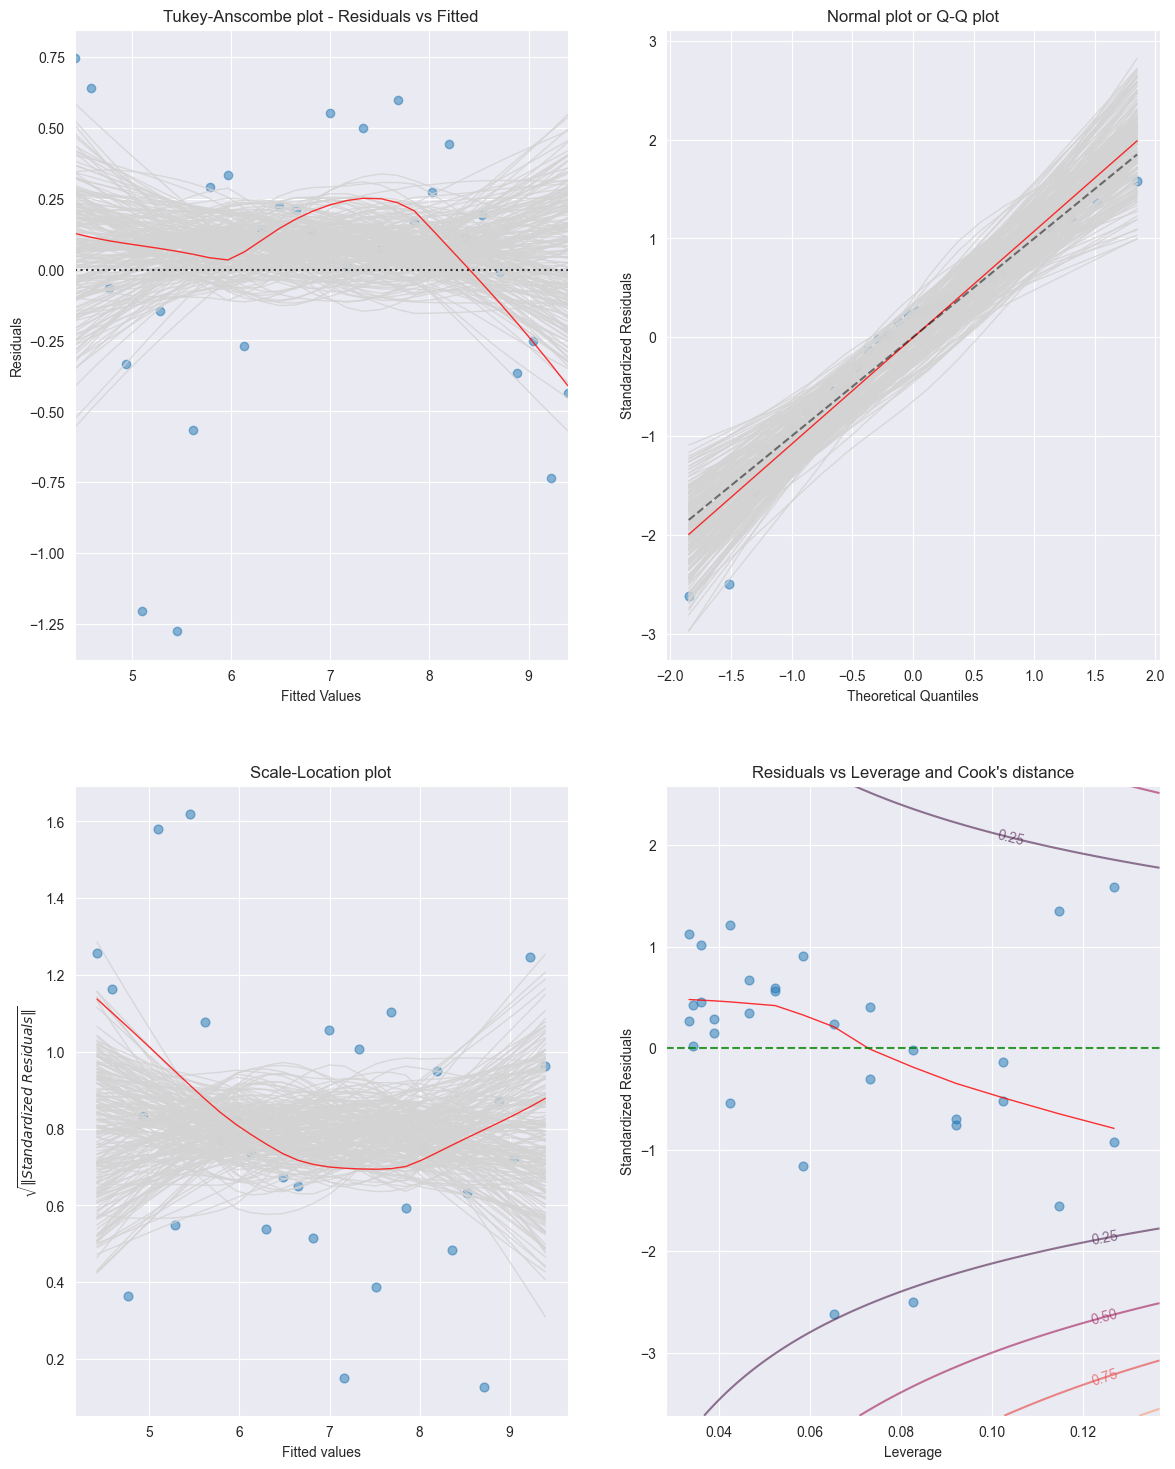

In [15]:
import statsmodels.api as sm
from TMA_def import *

# Read data
df = pd.read_csv('data/Income.csv')
x = df['education']
y = df['income']

""" Find Predictions, Residuals and Influence on the Residuals """
# Fit Linear Model
x_sm = sm.add_constant(x)
model = sm.OLS(np.sqrt(y), x_sm).fit()

tma_plots(model, n_samp = 200)